In [1]:
%reload_ext autoreload
%autoreload 2
# sns.set_theme()

In [2]:
import os, sys
import numpy as np
import pandas as pd

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 15})

In [3]:
from horn_1_3 import run_sweep_d1_d3, run_sweep_d1

# Plotting probability of satisfiability

In [4]:
def plot_sat(df):
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(df['d1'], df['d3'], df['sat'], cmap=plt.cm.jet, linewidth=0.2)  # cmap=plt.cm.viridis

    ax.set_ylabel('d3')
    ax.set_yticks(np.linspace(0, 5, 6))
    ax.set_ylim([0, 5])

    ax.set_xlabel('d1')
    ax.set_xticks(np.linspace(0, 0.25, 6))
    ax.set_xlim([0, 0.25])

    ax.set_zlabel('sat')
    ax.view_init(50, 70)
    # ax.set_title('Probability of satisfiability of random Horn-1-3-SAT')
    return fig

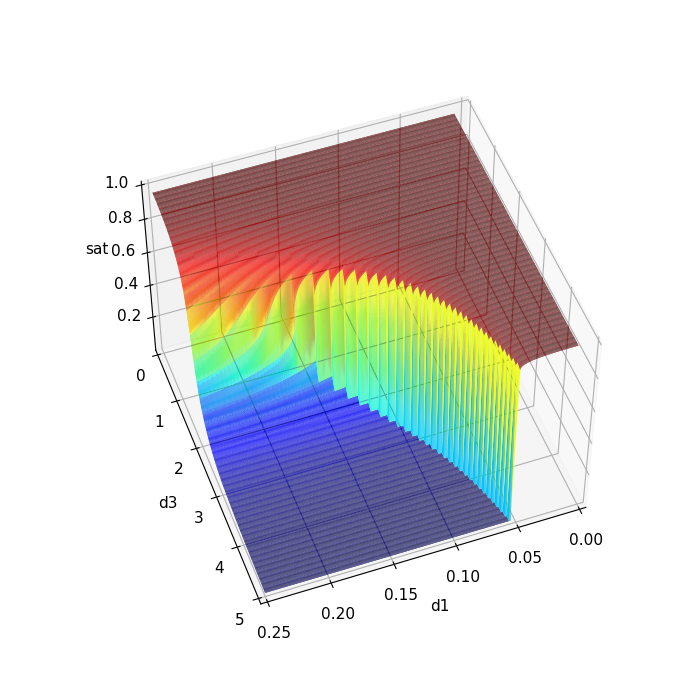

In [5]:
%matplotlib widget
d1_precision = 5
df = pd.read_csv(f'outputs/sat_sweep_d1_precision_{d1_precision}.tsv', sep='\t')
plt.rcParams.update({'font.size': 11})
fig_sat = plot_sat(df)

In [6]:
fig_sat.savefig('figures/sat.tiff')

# Plotting `h`

## 1. `h` vs the parameter sweep across `d1` and `d3`

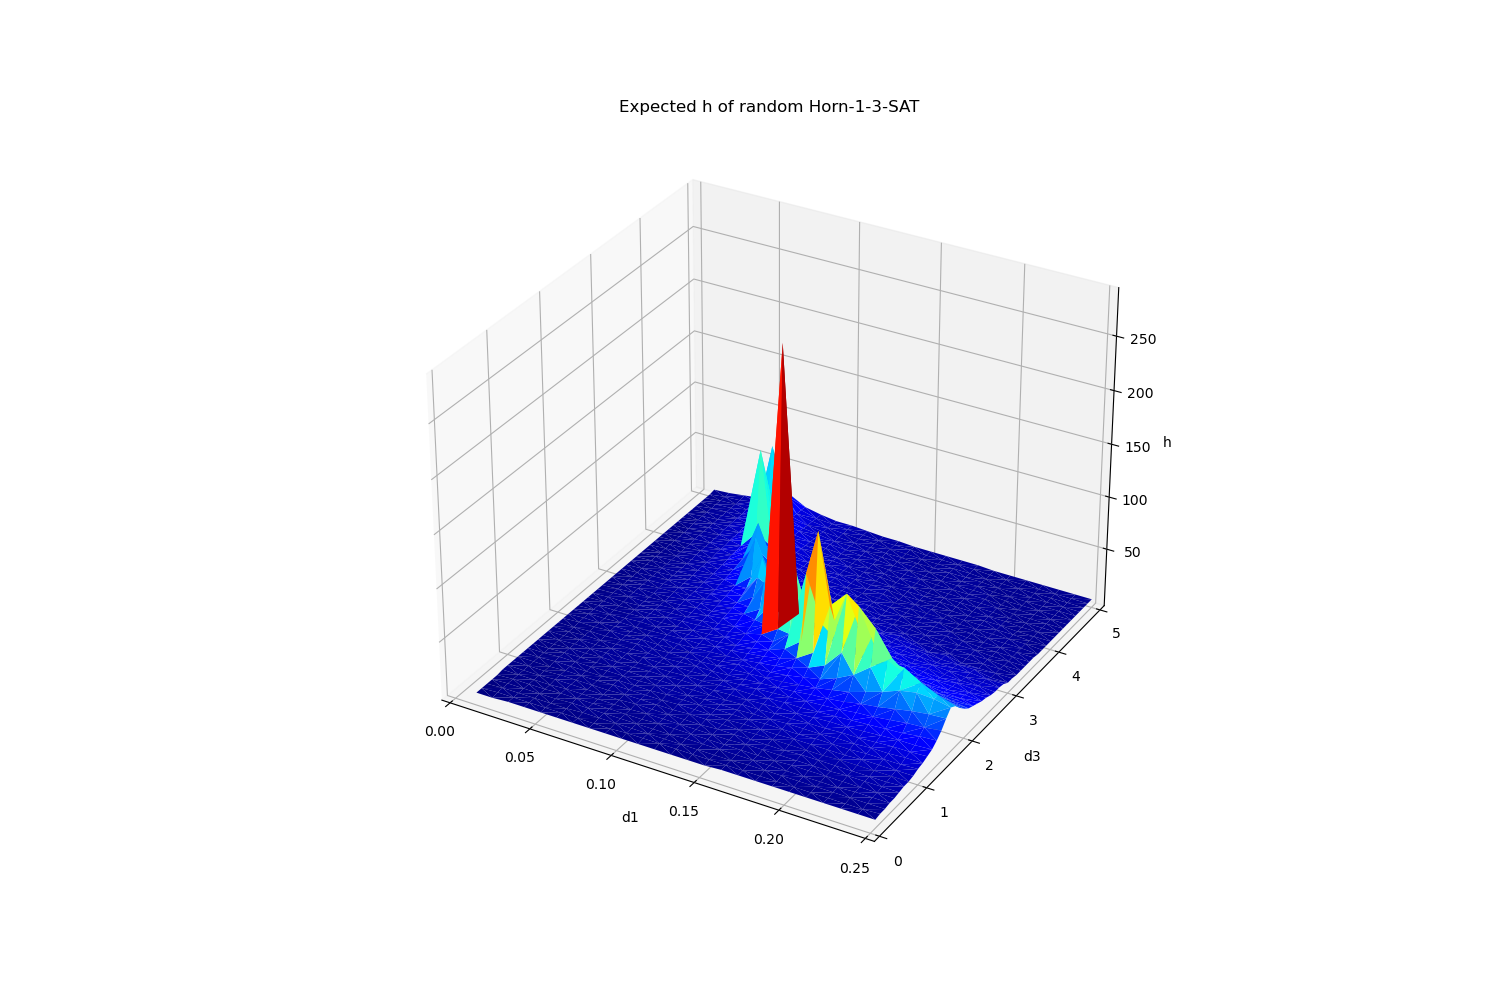

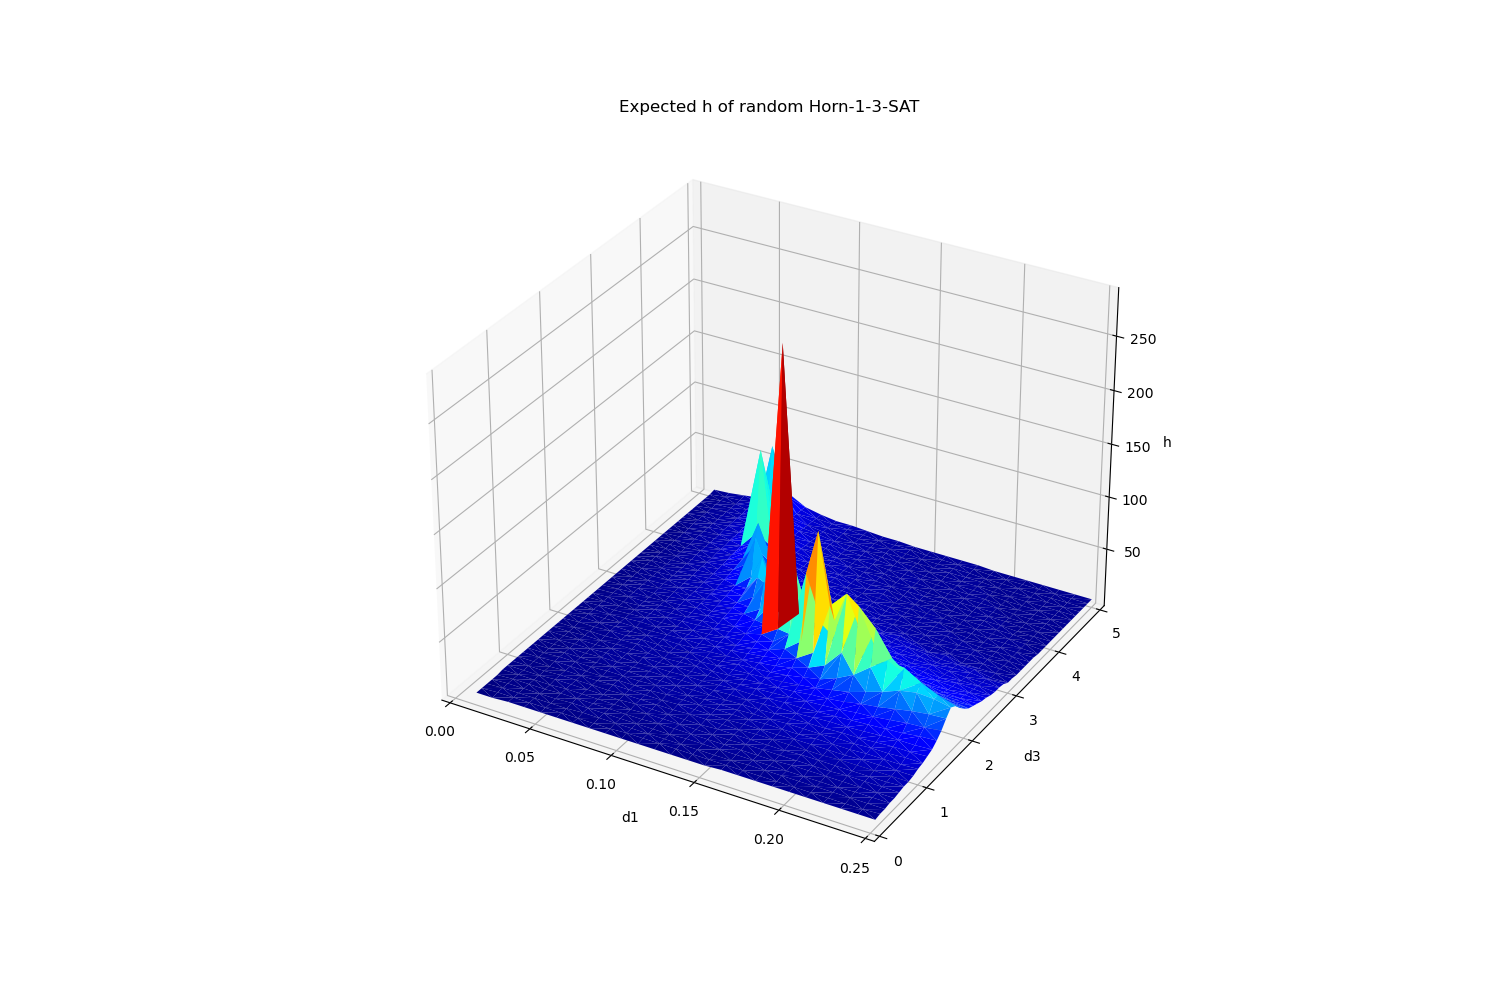

In [7]:
%matplotlib widget
# Make the plot
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(df['d1'], df['d3'], df['h'], cmap=plt.cm.jet, linewidth=0.2)  # cmap=plt.cm.viridis

ax.set_ylabel('d3')
ax.set_yticks(np.linspace(0, 5, 6))
ax.set_ylim([0, 5])

ax.set_xlabel('d1')
ax.set_xticks(np.linspace(0, 0.25, 6))
ax.set_xlim([0, 0.25])

ax.set_zlabel('h')

ax.set_title('Expected h of random Horn-1-3-SAT')
fig.show()
# plt.savefig(f'h_1-3.png', bbox_inches='tight', pad_inches=0.1)

# 2. Plotting `n` vs max `h`, for a fixed `d1`

In [4]:
def plot_n_vs_h(data):
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(1, 1, figsize=(9, 6))
    # ax = sns.lineplot(ax=ax, data=data, x='n', y='max_h', hue='d1', style='d1')
    ax = sns.lineplot(ax=ax, data=data, x='n', y='max_h')

    ax.set(xscale='log')
    # ax.set_title('n vs max h')
    ax.set_xlabel('n (in log scale)')
    # ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    return fig

## Plotting `n vs max h` with `d1` precision = 5

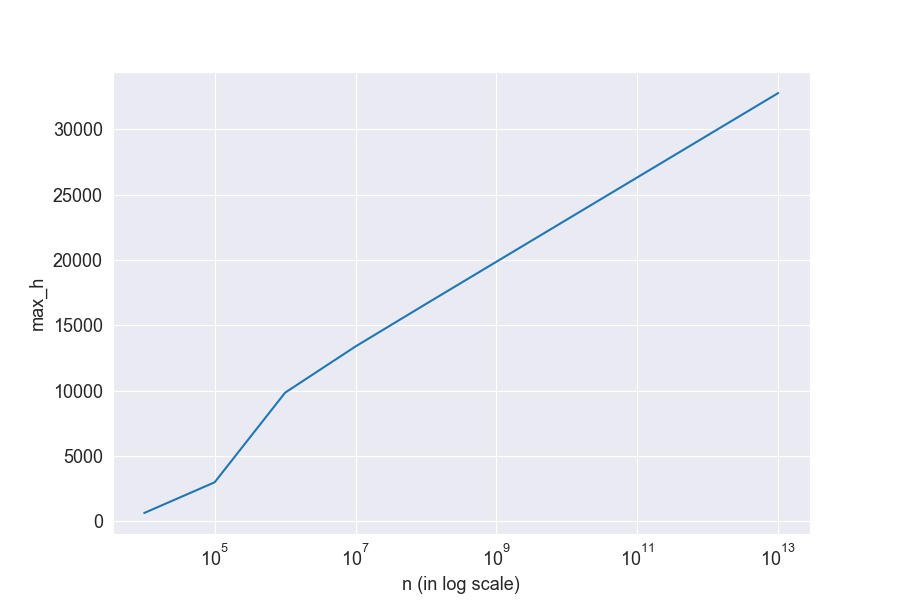

In [9]:
%matplotlib widget
plt.rcParams.update({'font.size': 13})
d1_precision = 5
df = pd.read_csv(f'outputs/h_sweep_d1_precision_{d1_precision}.tsv', sep='\t')
fig_h = plot_n_vs_h(df)

In [12]:
fig_h.savefig('figures/n_vs_h.pdf')